# 기본설치

In [451]:
! pip install folium
! pip install googlemaps

In [265]:
! pip install seaborn

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)


In [3]:
! pip install pandas

     --------------------------------------- 10.9/10.9 MB 65.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import folium
import googlemaps

In [5]:
import folium.plugins as plugins

In [7]:
%pwd

'C:\\Users\\SBAUser\\Jupyter_Python'

# 파일불러오기

In [11]:
sp = pd.read_csv('./data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보1205 (2).csv', encoding='euc-kr')

In [32]:
sp

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202211,1호선,동대문,728,4,10942,1871,8782,6391,14368,...,7946,518,2191,5,206,0,1,0,0,20221203
1,202211,1호선,동묘앞,205,4,3082,1052,3731,4674,6555,...,3580,89,1322,2,332,0,1,0,0,20221203
2,202211,1호선,서울역,698,24,8634,8662,13165,49665,42055,...,13413,2321,2639,2,192,0,0,0,0,20221203
3,202211,1호선,시청,121,0,2050,4369,3391,23225,7286,...,3194,872,850,1,26,0,0,0,0,20221203
4,202211,1호선,신설동,372,15,9256,2278,9260,8707,20784,...,7874,370,2070,1,6,0,0,0,0,20221203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55721,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
55722,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
55723,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
55724,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223


# 데이터 가공

## 필요없는 부분 삭제하기

In [16]:
sp.columns[0:15]

Index(['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원'],
      dtype='object')

In [616]:
sp2=sp.loc[:,['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원']]

In [617]:
sp2

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원
0,202211,1호선,동대문,728,4,10942,1871,8782,6391,14368,11493,20005,21825,18561,22349
1,202211,1호선,동묘앞,205,4,3082,1052,3731,4674,6555,8851,11419,21633,9128,18442
2,202211,1호선,서울역,698,24,8634,8662,13165,49665,42055,109445,71945,219435,60879,160791
3,202211,1호선,시청,121,0,2050,4369,3391,23225,7286,68121,9263,195016,11983,101983
4,202211,1호선,신설동,372,15,9256,2278,9260,8707,20784,24027,31812,57914,20507,33623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55721,201501,중앙선,운길산,0,0,177,56,642,403,1292,675,1479,1390,1438,3270
55722,201501,중앙선,원덕,1,0,292,4,415,46,537,248,823,344,980,273
55723,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,3027,25792,6573,14328,6133
55724,201501,중앙선,팔당,0,0,161,50,368,149,1227,523,910,1151,897,2931


In [26]:
sp2.dtypes

사용월              int64
호선명             object
지하철역            object
04시-05시 승차인원     int64
04시-05시 하차인원     int64
05시-06시 승차인원     int64
05시-06시 하차인원     int64
06시-07시 승차인원     int64
06시-07시 하차인원     int64
07시-08시 승차인원     int64
07시-08시 하차인원     int64
08시-09시 승차인원     int64
08시-09시 하차인원     int64
09시-10시 승차인원     int64
09시-10시 하차인원     int64
dtype: object

In [27]:
# 201901<=sp2<=202112

In [40]:
sp3

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원
0,202211,1호선,동대문,728,4,10942,1871,8782,6391,14368,11493,20005,21825,18561,22349
1,202211,1호선,동묘앞,205,4,3082,1052,3731,4674,6555,8851,11419,21633,9128,18442
2,202211,1호선,서울역,698,24,8634,8662,13165,49665,42055,109445,71945,219435,60879,160791
3,202211,1호선,시청,121,0,2050,4369,3391,23225,7286,68121,9263,195016,11983,101983
4,202211,1호선,신설동,372,15,9256,2278,9260,8707,20784,24027,31812,57914,20507,33623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55721,201501,중앙선,운길산,0,0,177,56,642,403,1292,675,1479,1390,1438,3270
55722,201501,중앙선,원덕,1,0,292,4,415,46,537,248,823,344,980,273
55723,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,3027,25792,6573,14328,6133
55724,201501,중앙선,팔당,0,0,161,50,368,149,1227,523,910,1151,897,2931


In [43]:
# Data1 = Data1.drop("Weight", axis = 1)

In [194]:
sp3=sp2[sp2["사용월"] >= 201901] 
sp4=sp3[sp3["사용월"] <= 202112]
sp4

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원
6740,202112,1호선,동대문,803,15,12276,1913,8716,5492,13464,10014,18832,21879,16495,20889
6741,202112,1호선,동묘앞,116,0,2423,756,3270,3915,5412,7362,8890,18151,7427,14958
6742,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,85455,55770,188733,43790,121596
6743,202112,1호선,시청,37,2,1902,4537,2827,19095,6322,56046,7816,168744,8475,78172
6744,202112,1호선,신설동,383,6,7270,2738,7731,10318,15891,21124,24588,58444,16025,32087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28389,201901,중앙선,원덕,30,0,233,7,466,60,860,185,1154,446,1355,336
28390,201901,중앙선,중랑,38,0,5443,362,8673,2274,23633,3783,24214,6937,13589,4812
28391,201901,중앙선,지평,0,0,0,0,0,0,187,138,142,53,2,0
28392,201901,중앙선,팔당,2,0,205,31,449,385,1264,837,1315,1733,1021,3260


In [213]:
sp4=sp4.drop('04시-05시 승차인원',axis=1)

In [215]:
sp4=sp4.drop('04시-05시 하차인원',axis=1)

In [216]:
sp4.head()

,사용월,호선명,지하철역,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,총인원
6740,202112,1호선,동대문,12276,1913,8716,5492,13464,10014,18832,21879,16495,20889,129970
6741,202112,1호선,동묘앞,2423,756,3270,3915,5412,7362,8890,18151,7427,14958,72564
6742,202112,1호선,서울역,8460,6094,11185,35735,34375,85455,55770,188733,43790,121596,591193
6743,202112,1호선,시청,1902,4537,2827,19095,6322,56046,7816,168744,8475,78172,353936
6744,202112,1호선,신설동,7270,2738,7731,10318,15891,21124,24588,58444,16025,32087,196216


## 승차총인원, 하차총인원 생성

In [458]:
sp4['승차총인원']=(sp4['05시-06시 승차인원'])+(sp4['06시-07시 승차인원'])+(sp4['07시-08시 승차인원'])+(sp4['08시-09시 승차인원'])+(sp4['09시-10시 승차인원'])

In [354]:
sp4['하차총인원']=(sp4['05시-06시 하차인원'])+(sp4['06시-07시 하차인원'])+(sp4['07시-08시 하차인원'])+(sp4['08시-09시 하차인원'])+(sp4['09시-10시 하차인원'])

In [460]:
sp4=sp4.drop('상차총인원',axis=1)

In [461]:
sp4

,사용월,호선명,지하철역,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,하차총인원,승차총인원
6740,202112,1호선,동대문,12276,1913,8716,5492,13464,10014,18832,21879,16495,20889,60187,69783
6741,202112,1호선,동묘앞,2423,756,3270,3915,5412,7362,8890,18151,7427,14958,45142,27422
6742,202112,1호선,서울역,8460,6094,11185,35735,34375,85455,55770,188733,43790,121596,437613,153580
6743,202112,1호선,시청,1902,4537,2827,19095,6322,56046,7816,168744,8475,78172,326594,27342
6744,202112,1호선,신설동,7270,2738,7731,10318,15891,21124,24588,58444,16025,32087,124711,71505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28389,201901,중앙선,원덕,233,7,466,60,860,185,1154,446,1355,336,1034,4068
28390,201901,중앙선,중랑,5443,362,8673,2274,23633,3783,24214,6937,13589,4812,18168,75552
28391,201901,중앙선,지평,0,0,0,0,187,138,142,53,2,0,191,331
28392,201901,중앙선,팔당,205,31,449,385,1264,837,1315,1733,1021,3260,6246,4254


In [219]:
# 총인원 컬럼별 합계

In [462]:
sp4 

,사용월,호선명,지하철역,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,하차총인원,승차총인원
6740,202112,1호선,동대문,12276,1913,8716,5492,13464,10014,18832,21879,16495,20889,60187,69783
6741,202112,1호선,동묘앞,2423,756,3270,3915,5412,7362,8890,18151,7427,14958,45142,27422
6742,202112,1호선,서울역,8460,6094,11185,35735,34375,85455,55770,188733,43790,121596,437613,153580
6743,202112,1호선,시청,1902,4537,2827,19095,6322,56046,7816,168744,8475,78172,326594,27342
6744,202112,1호선,신설동,7270,2738,7731,10318,15891,21124,24588,58444,16025,32087,124711,71505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28389,201901,중앙선,원덕,233,7,466,60,860,185,1154,446,1355,336,1034,4068
28390,201901,중앙선,중랑,5443,362,8673,2274,23633,3783,24214,6937,13589,4812,18168,75552
28391,201901,중앙선,지평,0,0,0,0,187,138,142,53,2,0,191,331
28392,201901,중앙선,팔당,205,31,449,385,1264,837,1315,1733,1021,3260,6246,4254


## 승차총인원, 하차총인원만

In [463]:
sp5=sp4.loc[:,['사용월','지하철역','승차총인원','하차총인원']]

In [464]:
sp5

,사용월,지하철역,승차총인원,하차총인원
6740,202112,동대문,69783,60187
6741,202112,동묘앞,27422,45142
6742,202112,서울역,153580,437613
6743,202112,시청,27342,326594
6744,202112,신설동,71505,124711
...,...,...,...,...
28389,201901,원덕,4068,1034
28390,201901,중랑,75552,18168
28391,201901,지평,331,191
28392,201901,팔당,4254,6246


'C:\\Users\\SBAUser\\Jupyter_Python'

## 승차 19,20,21년도 분리

In [501]:
sp19=sp5.loc[sp['사용월']==201909]

In [502]:
sp19=sp19.sort_values(by='승차총인원',ascending=False).head(10)

In [503]:
sp19

,사용월,지하철역,승차총인원,하차총인원
23052,201909,신림,860184,188073
23029,201909,구로디지털단지,554219,499924
23043,201909,서울대입구(관악구청),518571,208983
23098,201909,연신내,491909,125363
23067,201909,잠실(송파구청),485570,478871
23051,201909,신도림,482045,280812
23127,201909,쌍문,443130,81223
23147,201909,까치산,438984,66089
23124,201909,수유(강북구청),422459,142417
23185,201909,화곡,411066,83164


In [495]:
li=[]
li=[[sp19['지하철역']],[sp20['지하철역']],[sp21['지하철역']]]
li

[[23052             신림
  23029        구로디지털단지
  23043    서울대입구(관악구청)
  23098            연신내
  23067       잠실(송파구청)
  23051            신도림
  23127             쌍문
  23147            까치산
  23124       수유(강북구청)
  23185             화곡
  Name: 지하철역, dtype: object],
 [15875             신림
  15852        구로디지털단지
  15866    서울대입구(관악구청)
  15921            연신내
  15874            신도림
  15970            까치산
  15890       잠실(송파구청)
  15950             쌍문
  15947       수유(강북구청)
  16010             화곡
  Name: 지하철역, dtype: object],
 [8604             신림
  8581        구로디지털단지
  8595    서울대입구(관악구청)
  8650            연신내
  8603            신도림
  8700            까치산
  8619       잠실(송파구청)
  8679             쌍문
  8742             화곡
  8676       수유(강북구청)
  Name: 지하철역, dtype: object]]

### 그래프화

In [469]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,50))

<Figure size 10000x5000 with 0 Axes>

<Figure size 10000x5000 with 0 Axes>

In [470]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(100,50))

<Figure size 10000x5000 with 0 Axes>

<Figure size 10000x5000 with 0 Axes>

In [485]:
#글씨체 조정
font_path = 'C:\Windows\Fonts\Malgun.ttf'
fontname = fm.FontProperties(fname=font_path, size=18).get_name()
plt.rcParams['font.family']=fontname

In [472]:
plt.rcParams['axes.unicode_minus']=False

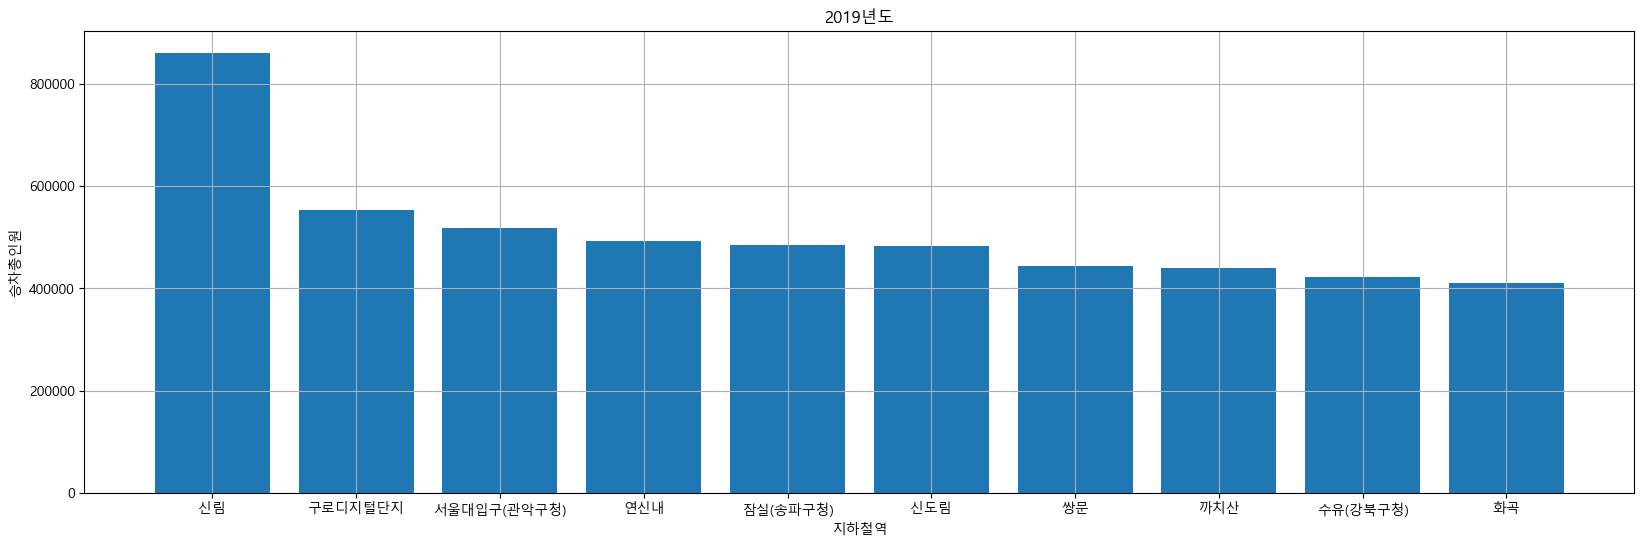

In [504]:
plt.figure(figsize=(20,6))
plt.bar(sp19['지하철역'],sp19['승차총인원'])
plt.title('2019년도')
plt.xlabel('지하철역')
plt.ylabel('승차총인원')
plt.grid()
plt.show()

In [476]:
sp20=sp5.loc[sp['사용월']== 202009 ]

In [477]:
sp20=sp20.sort_values(by='승차총인원',ascending=False).head(10)
sp20

,사용월,지하철역,승차총인원,하차총인원
15875,202009,신림,706664,149388
15852,202009,구로디지털단지,455469,442554
15866,202009,서울대입구(관악구청),429003,143737
15921,202009,연신내,395390,91422
15874,202009,신도림,369404,215373
15970,202009,까치산,362145,55065
15890,202009,잠실(송파구청),354988,335008
15950,202009,쌍문,354028,65433
15947,202009,수유(강북구청),330341,112680
16010,202009,화곡,329471,67297


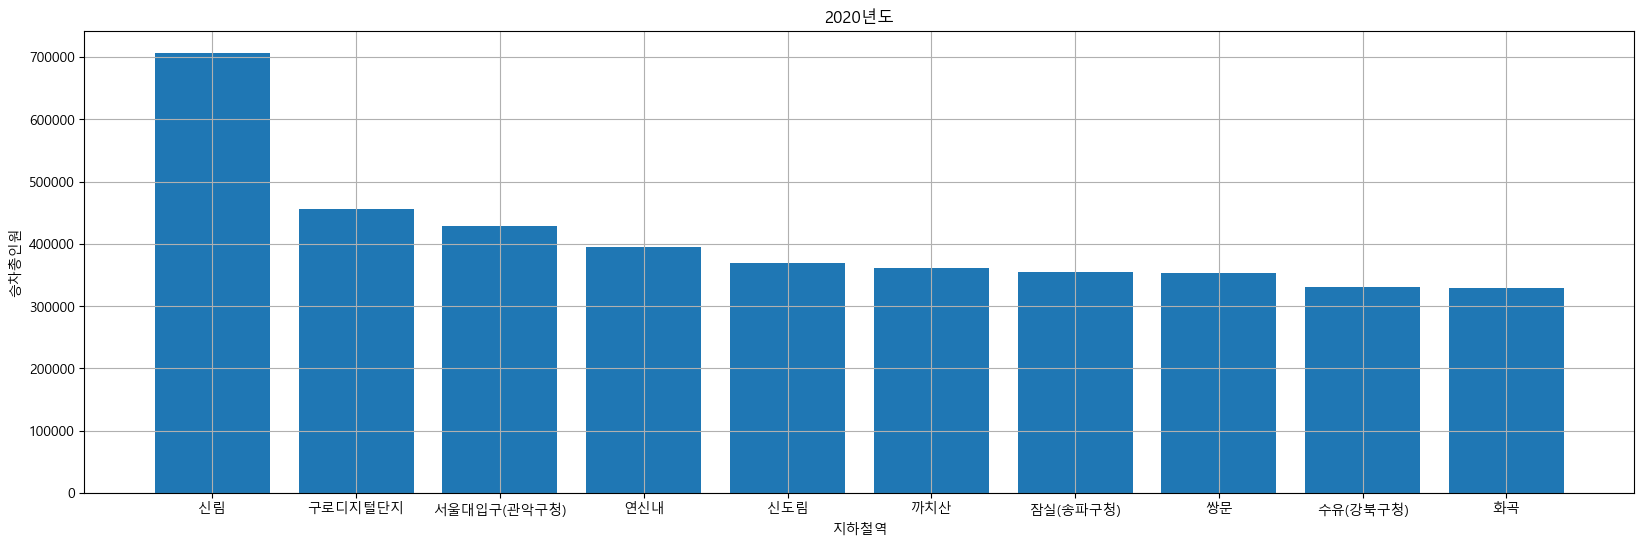

In [479]:
plt.figure(figsize=(20,6))
plt.bar(sp20['지하철역'],sp20['승차총인원'])
plt.title('2020년도')
plt.xlabel('지하철역')
plt.ylabel('승차총인원')
plt.grid()
plt.show()

In [480]:
sp21=sp5.loc[sp4['사용월']==202109]

In [481]:
sp21

,사용월,지하철역,승차총인원,하차총인원
8567,202109,동대문,63389,58292
8568,202109,동묘앞,26156,50140
8569,202109,서울역,135492,352181
8570,202109,시청,23947,270820
8571,202109,신설동,63516,116581
...,...,...,...,...
9169,202109,원덕,3262,1907
9170,202109,중랑,64938,15393
9171,202109,지평,628,503
9172,202109,팔당,4984,9685


In [482]:
sp21=sp21.sort_values(by='승차총인원',ascending=False).head(10)
sp21

,사용월,지하철역,승차총인원,하차총인원
8604,202109,신림,675513,150571
8581,202109,구로디지털단지,427997,419967
8595,202109,서울대입구(관악구청),403454,149890
8650,202109,연신내,379921,96179
8603,202109,신도림,357453,194580
8700,202109,까치산,352859,54347
8619,202109,잠실(송파구청),351636,323137
8679,202109,쌍문,343889,67449
8742,202109,화곡,323283,67281
8676,202109,수유(강북구청),322189,115127


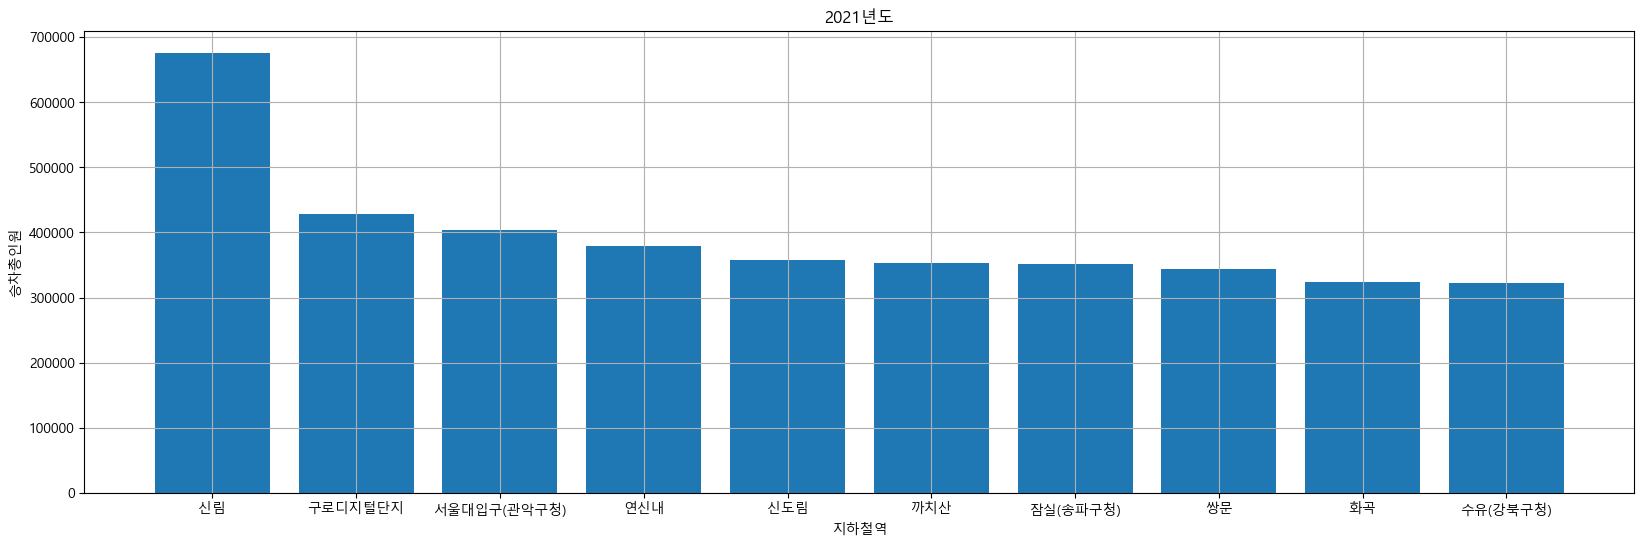

In [483]:
plt.figure(figsize=(20,6))
plt.bar(sp21['지하철역'],sp21['승차총인원'])
plt.title('2021년도')
plt.xlabel('지하철역')
plt.ylabel('승차총인원')
plt.grid()
plt.show()

### 분석결과

가장 많이 승차하는 구간은 : 4구간(신림,구로디지털단지,서울대입구,연신내)로 거의 고정이었으며, 나머지 6개(잠실,신도림,쌍문,까치산,수유,화곡)는 조금의 변동이 있었다.</br>
19년도에 비해 20,21년도는 역별로 10만명씩 승차인원이 줄었다 </br> 
왜 이런 결과가 나왔을까? </br>
인구분포도, 환승역 등

In [496]:
[sp19['지하철역']],[sp20['지하철역']],[sp21['지하철역']]

([23052             신림
  23029        구로디지털단지
  23043    서울대입구(관악구청)
  23098            연신내
  23067       잠실(송파구청)
  23051            신도림
  23127             쌍문
  23147            까치산
  23124       수유(강북구청)
  23185             화곡
  Name: 지하철역, dtype: object],
 [15875             신림
  15852        구로디지털단지
  15866    서울대입구(관악구청)
  15921            연신내
  15874            신도림
  15970            까치산
  15890       잠실(송파구청)
  15950             쌍문
  15947       수유(강북구청)
  16010             화곡
  Name: 지하철역, dtype: object],
 [8604             신림
  8581        구로디지털단지
  8595    서울대입구(관악구청)
  8650            연신내
  8603            신도림
  8700            까치산
  8619       잠실(송파구청)
  8679             쌍문
  8742             화곡
  8676       수유(강북구청)
  Name: 지하철역, dtype: object])

## 하차 19,20,21년도 분리

In [575]:
# sp5.loc[ (sp4['지하철역']=='강남') & (sp4['사용월'] ==201909)]

In [546]:
sp5

,사용월,지하철역,승차총인원,하차총인원
6740,202112,동대문,69783,60187
6741,202112,동묘앞,27422,45142
6742,202112,서울역,153580,437613
6743,202112,시청,27342,326594
6744,202112,신설동,71505,124711
...,...,...,...,...
28389,201901,원덕,4068,1034
28390,201901,중랑,75552,18168
28391,201901,지평,331,191
28392,201901,팔당,4254,6246


In [560]:
sp19out=sp5.loc[sp['사용월']==201909]
sp19out=sp19out.sort_values(by='하차총인원',ascending=False).head(10)
sp19out

,사용월,지하철역,승차총인원,하차총인원
23025,201909,강남,215596,891396
23058,201909,역삼,83506,754918
23041,201909,삼성(무역센터),85022,747896
23224,201909,가산디지털단지,78314,685860
23045,201909,선릉,112420,654807
23065,201909,을지로입구,55440,629756
23021,201909,종각,42348,534997
23017,201909,서울역,206333,526459
23097,201909,양재(서초구청),143743,518955
23142,201909,광화문(세종문화회관),44011,504094


In [559]:
# sp19out.loc[ (sp19out['지하철역']=='강남') & (sp19out['사용월'] ==201909)]

### 그래프화

In [574]:
sp19out=sp5.loc[sp['사용월']==201909]
sp19out=sp19out.sort_values(by='하차총인원',ascending=False).head(10)
sp19out

,사용월,지하철역,승차총인원,하차총인원
23025,201909,강남,215596,891396
23058,201909,역삼,83506,754918
23041,201909,삼성(무역센터),85022,747896
23224,201909,가산디지털단지,78314,685860
23045,201909,선릉,112420,654807
23065,201909,을지로입구,55440,629756
23021,201909,종각,42348,534997
23017,201909,서울역,206333,526459
23097,201909,양재(서초구청),143743,518955
23142,201909,광화문(세종문화회관),44011,504094


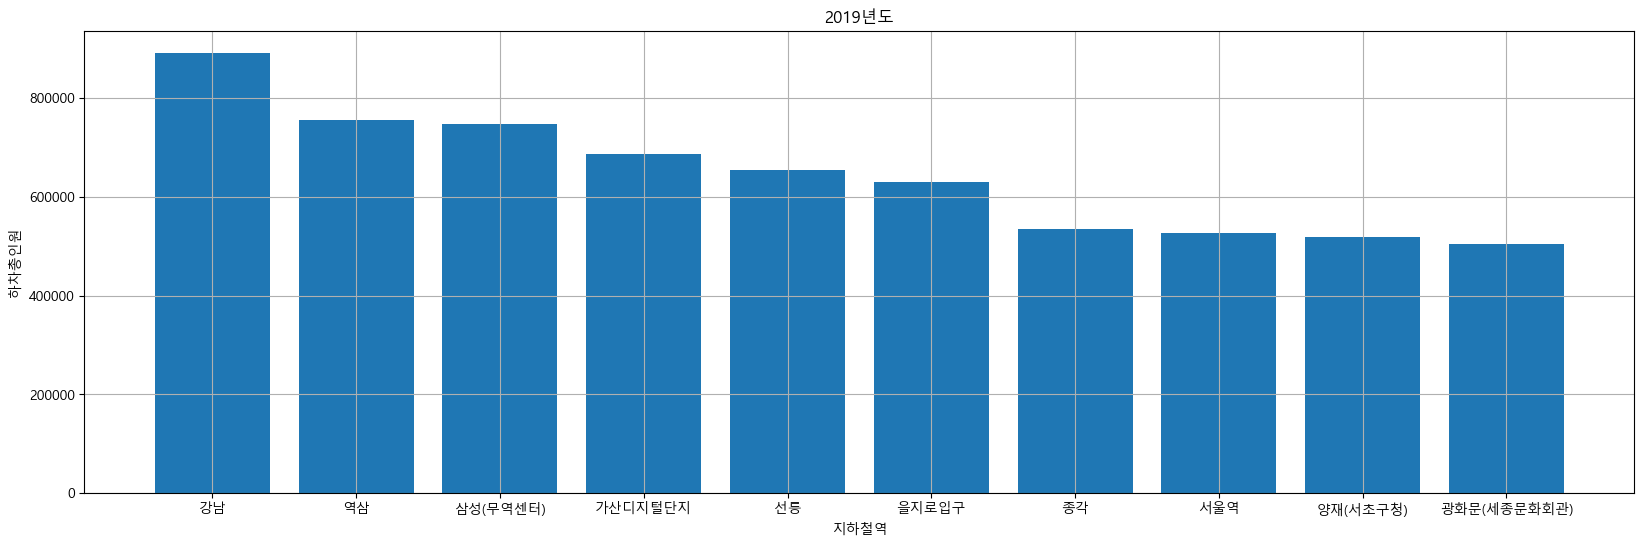

In [561]:
plt.figure(figsize=(20,6))
plt.bar(sp19out['지하철역'],sp19out['하차총인원'])
plt.title('2019년도')
plt.xlabel('지하철역')
plt.ylabel('하차총인원')
plt.grid()
plt.show()

In [568]:
sp20out=sp5.loc[sp['사용월']==202009]
sp20out=sp20out.sort_values(by='하차총인원',ascending=False).head(10)
sp20out

,사용월,지하철역,승차총인원,하차총인원
15848,202009,강남,138313,695291
16050,202009,가산디지털단지,68444,655829
15881,202009,역삼,61905,639747
15864,202009,삼성(무역센터),56776,605541
15868,202009,선릉,76106,558045
15888,202009,을지로입구,31830,475091
15852,202009,구로디지털단지,455469,442554
15920,202009,양재(서초구청),103072,441586
15869,202009,성수,80717,427414
15844,202009,종각,27006,387547


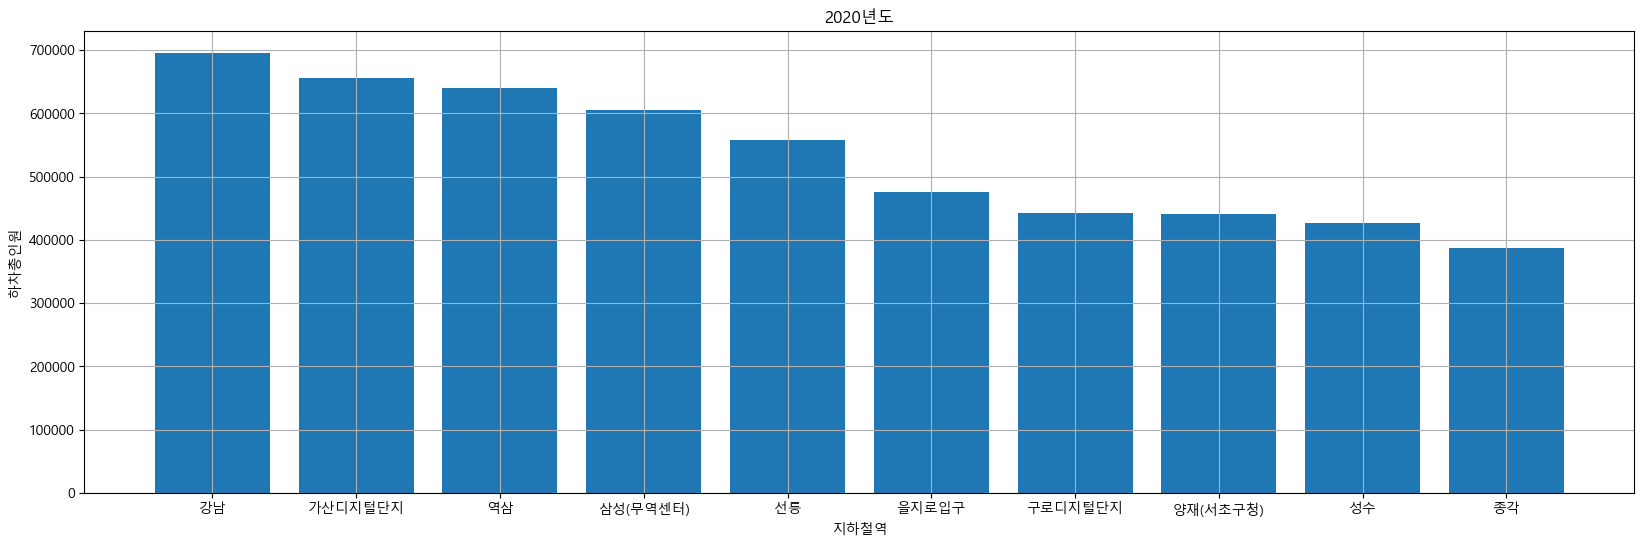

In [569]:
plt.figure(figsize=(20,6))
plt.bar(sp20out['지하철역'],sp20out['하차총인원'])
plt.title('2020년도')
plt.xlabel('지하철역')
plt.ylabel('하차총인원')
plt.grid()
plt.show()

In [570]:
sp21out=sp5.loc[sp['사용월']==202109]
sp21out=sp21out.sort_values(by='하차총인원',ascending=False).head(10)
sp21out

,사용월,지하철역,승차총인원,하차총인원
8577,202109,강남,137404,679530
8782,202109,가산디지털단지,66590,627231
8610,202109,역삼,59820,620519
8593,202109,삼성(무역센터),54752,553314
8597,202109,선릉,76753,524588
8617,202109,을지로입구,33516,455338
8598,202109,성수,76267,433386
8581,202109,구로디지털단지,427997,419967
8649,202109,양재(서초구청),108716,419115
8573,202109,종각,26298,363213


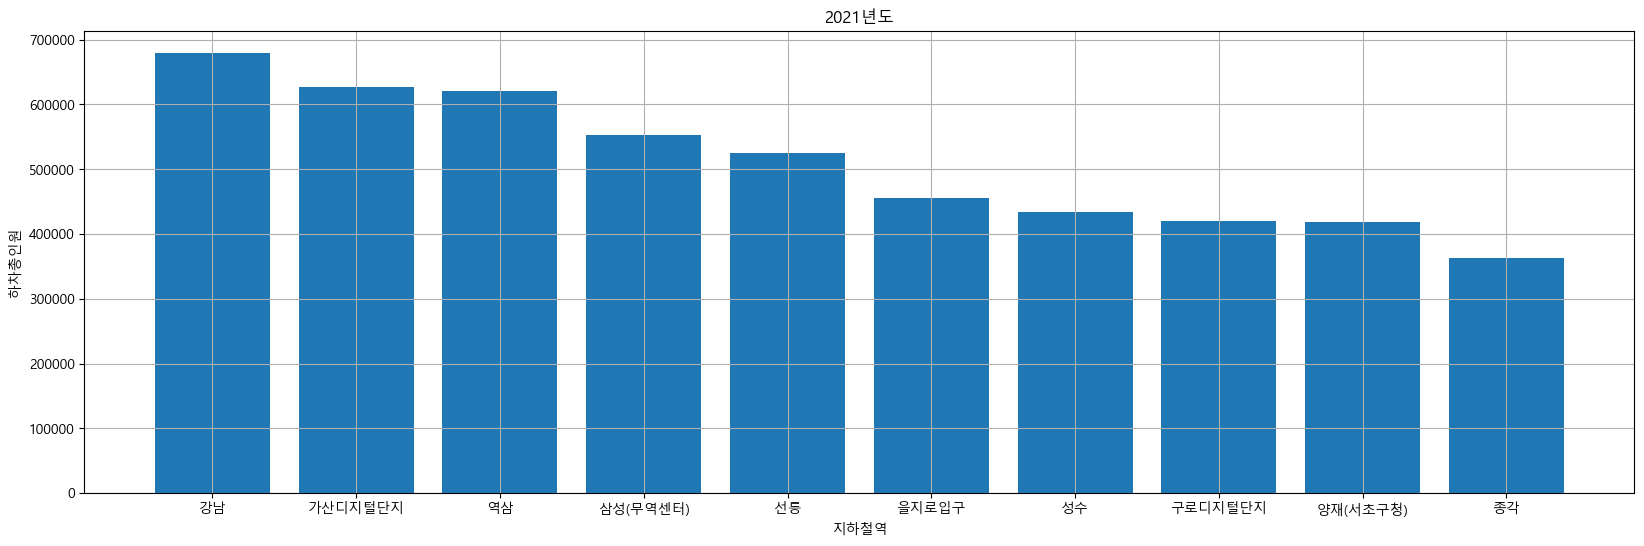

In [571]:
plt.figure(figsize=(20,6))
plt.bar(sp21out['지하철역'],sp21out['하차총인원'])
plt.title('2021년도')
plt.xlabel('지하철역')
plt.ylabel('하차총인원')
plt.grid()
plt.show()

### 분석결과

In [572]:
[sp19out['지하철역']],[sp20out['지하철역']],[sp21out['지하철역']]

([23025             강남
  23058             역삼
  23041       삼성(무역센터)
  23224        가산디지털단지
  23045             선릉
  23065          을지로입구
  23021             종각
  23017            서울역
  23097       양재(서초구청)
  23142    광화문(세종문화회관)
  Name: 지하철역, dtype: object],
 [15848          강남
  16050     가산디지털단지
  15881          역삼
  15864    삼성(무역센터)
  15868          선릉
  15888       을지로입구
  15852     구로디지털단지
  15920    양재(서초구청)
  15869          성수
  15844          종각
  Name: 지하철역, dtype: object],
 [8577          강남
  8782     가산디지털단지
  8610          역삼
  8593    삼성(무역센터)
  8597          선릉
  8617       을지로입구
  8598          성수
  8581     구로디지털단지
  8649    양재(서초구청)
  8573          종각
  Name: 지하철역, dtype: object])

(1) 19년도에 비해 20년도, 21년도 강남이 20만명이 줄어든 것에 비해 가산디지털단지는 3만명정도만 줄어든 것으로 파악된다.</br>
게다가 승차총인원, 하차총인원 둘다 많은 높은 것으로 보아서 </br>
이는 코로나로 인해 집에서 자택근무, 온라인수업이 늘어나며 , 컴퓨터부품판매업종이 바빠졌고, 이는 <b>컴퓨터 관련 수요</b> 가 늘어난것으로 파악된다. </br>
(2) 19년도에 비해 20년도, 21년도 서울역은 top10자리에서 밀려나게 되었다. 이는 여행수요의 감소가 원인인 것으로 추측된다. </br>
(3) 19년도에 비해 20년도, 21년도 종각역은 10위로 밀어나게 되었다. 이는 종각 부근의 경제침체화로 이뤄졌다. (부동산 가격비교를 써봐도 괜찮을듯) </br> 

## 승차 19~21년도 비교 그래프

In [648]:
sp5

,사용월,지하철역,승차총인원,하차총인원
6740,202112,동대문,69783,60187
6741,202112,동묘앞,27422,45142
6742,202112,서울역,153580,437613
6743,202112,시청,27342,326594
6744,202112,신설동,71505,124711
...,...,...,...,...
28389,201901,원덕,4068,1034
28390,201901,중랑,75552,18168
28391,201901,지평,331,191
28392,201901,팔당,4254,6246


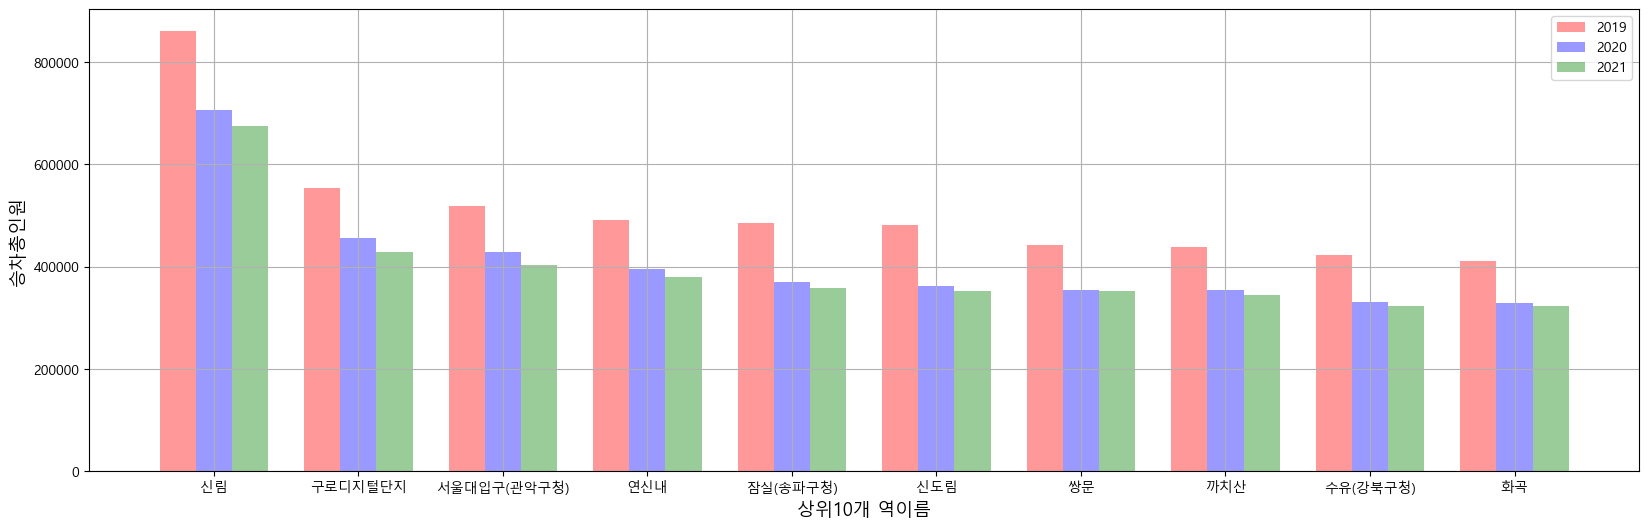

In [722]:
subway = ['신림','구로디지털단지', '서울대입구(관악구청)',
          '연신내','잠실(송파구청)','신도림','쌍문','까치산','수유(강북구청)','화곡']
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(20,6))
bar_width = 0.25
# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
x = np.arange(10)
# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(x, sp19['승차총인원'], bar_width, alpha=0.4, color='red', label='2019')
b2 = plt.bar(x + bar_width, sp20['승차총인원'], bar_width, alpha=0.4, color='blue', label='2020')
b3 = plt.bar(x + 2 * bar_width, sp21['승차총인원'], bar_width, alpha=0.4, color='green', label='2021')
# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 10 + bar_width, 1), subway)
# x축, y축 이름 및 범례 설정
plt.xlabel('상위10개 역이름', size = 13)
plt.ylabel('승차총인원', size = 13)
plt.legend()
plt.grid()
plt.show()

#  혼잡도 그래프

## 19년도 혼잡도

### csv 불러오기

혼잡도의 경우 : 정원대비 승차인원으로, 승차인과 좌석수가 일치할 경우를 혼잡도 34%로 산정이며 2년주기로 업데이트하기때문에 19년도, 21년도만 비교

In [638]:
#19년도 혼잡도
df19=pd.read_csv('./data/서울교통공사_혼잡도_20191231.csv',encoding='euc-kr')
df19.head()

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,24시00분,24시30분
0,평일,1호선,150,서울역,상선,8.2,12.9,21.5,28.4,46.7,...,15.1,15.9,17.1,16,19,15.2,10.5,7.8,6,0.9
1,평일,1호선,150,서울역,하선,11.8,13.5,12.2,17.8,26.4,...,36.5,31.2,37.6,44.6,45.6,37.8,28.8,19.3,7.1,0.4
2,평일,1호선,151,시청,상선,7.7,11.2,19.6,24.4,36.2,...,18.7,18.3,20.7,22,24,18.7,13.7,10,6.9,1.0
3,평일,1호선,151,시청,하선,9.5,11.3,11.6,16.7,23.2,...,32,27.7,34.8,39.3,37.4,36.3,23,18.1,4,1.6
4,평일,1호선,152,종각,상선,6.3,8.1,15.5,16.6,22.7,...,25.8,24.2,30,31.9,34,26.8,18.8,12.5,9.1,1.2


### 필요없는부분 삭제하기

In [639]:
df19.columns[0:15]


Index(['조사일자', '호선', '역번호', '역명', '구분', '5시30분', '6시00분', '6시30분', '7시00분',
       '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분'],
      dtype='object')

In [640]:
df19v2=df19.iloc[:,0:15]
df19v2

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분
0,평일,1호선,150,서울역,상선,8.2,12.9,21.5,28.4,46.7,70,74.5,52.2,57.1,38.5
1,평일,1호선,150,서울역,하선,11.8,13.5,12.2,17.8,26.4,34.8,25.2,21,17,16.4
2,평일,1호선,151,시청,상선,7.7,11.2,19.6,24.4,36.2,53.7,51.7,47.1,47.1,37.4
3,평일,1호선,151,시청,하선,9.5,11.3,11.6,16.7,23.2,34.1,26.4,21,16.8,16.4
4,평일,1호선,152,종각,상선,6.3,8.1,15.5,16.6,22.7,34.8,28.7,32.4,35,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,일요일,8호선,2825,신흥,하선,6.9,3.4,4,2.8,6.3,5.4,6,8.2,9.3,10.5
1664,일요일,8호선,2826,수진,상선,2.4,2.2,2.2,2.2,2.5,3.3,4.1,5.6,7.1,5.7
1665,일요일,8호선,2826,수진,하선,11,3.7,3.2,2.6,4.1,5.5,5.8,7.6,9.4,10
1666,일요일,8호선,2827,모란,상선,1.8,2,1.7,1.7,1.8,2.1,3.1,3.2,5,4


In [ ]:
''

In [641]:
df19v3=df19v2[df19v2['조사일자']=='평일']
df19v3

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분
0,평일,1호선,150,서울역,상선,8.2,12.9,21.5,28.4,46.7,70,74.5,52.2,57.1,38.5
1,평일,1호선,150,서울역,하선,11.8,13.5,12.2,17.8,26.4,34.8,25.2,21,17,16.4
2,평일,1호선,151,시청,상선,7.7,11.2,19.6,24.4,36.2,53.7,51.7,47.1,47.1,37.4
3,평일,1호선,151,시청,하선,9.5,11.3,11.6,16.7,23.2,34.1,26.4,21,16.8,16.4
4,평일,1호선,152,종각,상선,6.3,8.1,15.5,16.6,22.7,34.8,28.7,32.4,35,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,평일,8호선,2825,신흥,하선,14.7,7.5,8.2,9.2,11.9,21.9,14,10.5,9.2,8.4
552,평일,8호선,2826,수진,상선,4.9,4.1,3.7,4.2,6.7,14.3,12.6,11.4,8.9,8.7
553,평일,8호선,2826,수진,하선,21.1,8.1,9.5,9.8,12.5,20.6,13.8,10.7,9.5,8.6
554,평일,8호선,2827,모란,상선,2.5,2.6,2.5,2.1,3,8.8,9.2,7.5,7.5,6.8


In [696]:
df19v4=df19v3.astype({'5시30분':'float','6시00분':'float','6시30분':'float','7시00분':'float','7시30분':'float','8시00분':'float','8시30분':'float','9시00분':'float','9시30분':'float','10시00분':'float'}).dtypes

In [720]:
df21v4['5시30분'].describe()['mean']

35.929

In [667]:
# df19v4=df19v3.sort_values(by='8시00분',ascending=False).head(100)

In [666]:
# df19v4

In [ ]:
1) 100개의 혼잡도를 평균내서 시간별 혼잡도를 구해서 몇시가 가장 혼잡한지 표현.
2) 그 시간대를 토대로 가장 혼잡한 10개역을 표현.
3) 출근시간 퇴근시간 별로.

## 21년도 혼잡도

### csv 불러오기

In [630]:
df21=pd.read_csv('./data/서울교통공사_지하철혼잡도정보_20211231.csv',encoding='euc-kr')
df21.head()

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
1,2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,...,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
2,3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
3,4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,...,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
4,5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8


### 필요없는부분 삭제하기

In [633]:
df21v2=df21.iloc[:,0:15]
df21

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분
0,1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,43.3,53.6,70.9,40.4,38.0
1,2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,29.3,27.7,19.0,18.5,15.1
2,3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,32.0,40.6,50.9,30.8,35.8
3,4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,27.0,24.7,20.0,18.4,14.5
4,5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,19.6,25.5,26.5,19.2,26.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1700,일요일,8,2825,신흥,하선,7.0,3.0,2.2,2.1,2.6,3.7,3.7,5.4,5.2
1700,1701,일요일,8,2826,수진,상선,2.4,1.5,3.2,2.2,2.2,2.7,3.1,3.8,5.0
1701,1702,일요일,8,2826,수진,하선,9.3,4.1,2.6,2.1,3.1,4.3,4.5,5.5,6.0
1702,1703,일요일,8,2827,모란,상선,1.6,0.9,2.5,1.3,1.2,1.6,2.1,2.8,3.6


In [635]:
df21v2=df21[df21['조사일자']=='평일']
df21v2

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분
0,1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,43.3,53.6,70.9,40.4,38.0
1,2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,29.3,27.7,19.0,18.5,15.1
2,3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,32.0,40.6,50.9,30.8,35.8
3,4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,27.0,24.7,20.0,18.4,14.5
4,5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,19.6,25.5,26.5,19.2,26.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,564,평일,8,2825,신흥,하선,11.3,6.9,8.1,9.9,10.1,16.1,11.1,8.4,7.9
564,565,평일,8,2826,수진,상선,4.7,3.4,3.6,3.8,6.0,12.6,9.8,9.7,6.5
565,566,평일,8,2826,수진,하선,15.6,8.1,8.6,10.9,11.0,16.2,11.6,9.0,8.3
566,567,평일,8,2827,모란,상선,2.4,1.9,2.1,1.7,2.6,7.2,6.2,5.8,5.4


In [636]:
df21v3=df21v2[df21v2['조사일자']=='평일']
df21v3

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분
0,1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,43.3,53.6,70.9,40.4,38.0
1,2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,29.3,27.7,19.0,18.5,15.1
2,3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,32.0,40.6,50.9,30.8,35.8
3,4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,27.0,24.7,20.0,18.4,14.5
4,5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,19.6,25.5,26.5,19.2,26.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,564,평일,8,2825,신흥,하선,11.3,6.9,8.1,9.9,10.1,16.1,11.1,8.4,7.9
564,565,평일,8,2826,수진,상선,4.7,3.4,3.6,3.8,6.0,12.6,9.8,9.7,6.5
565,566,평일,8,2826,수진,하선,15.6,8.1,8.6,10.9,11.0,16.2,11.6,9.0,8.3
566,567,평일,8,2827,모란,상선,2.4,1.9,2.1,1.7,2.6,7.2,6.2,5.8,5.4


In [645]:
df21v4=df21v3.sort_values(by='8시00분',ascending=False).head(100)  # 가장 바쁜 시간대인 8시00분으로 기준
df21v4

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분
211,212,평일,4,419,한성대입구,하선,43.7,35.3,44.2,65.2,95.0,150.8,113.1,88.1,68.2
209,210,평일,4,418,성신여대입구,하선,54.9,34.2,42.9,69.0,95.5,150.6,106.9,85.8,64.1
213,214,평일,4,420,혜화,하선,44.9,34.6,42.2,62.4,90.4,141.6,108.2,89.8,65.9
135,136,평일,3,315,무악재,하선,35.4,33.2,45.2,65.4,96.2,140.6,114.0,76.4,53.4
207,208,평일,4,417,길음,하선,52.7,29.8,42.0,65.7,88.3,140.6,98.5,76.8,56.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,21,평일,2,201,시청,내선,15.3,18.8,22.4,36.7,45.7,85.7,68.6,38.3,33.6
312,313,평일,5,2546,아차산,상선,24.8,23.2,41.0,48.9,63.6,85.6,70.5,61.2,49.3
318,319,평일,5,2549,강동,상선,17.5,26.4,37.5,50.3,52.1,85.6,61.5,62.0,35.1
84,85,평일,2,233,대림,내선,77.1,49.9,29.4,39.6,60.3,85.5,59.1,47.3,29.9


In [644]:
df21v4.head(100)

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분
211,212,평일,4,419,한성대입구,하선,43.7,35.3,44.2,65.2,95.0,150.8,113.1,88.1,68.2
209,210,평일,4,418,성신여대입구,하선,54.9,34.2,42.9,69.0,95.5,150.6,106.9,85.8,64.1
213,214,평일,4,420,혜화,하선,44.9,34.6,42.2,62.4,90.4,141.6,108.2,89.8,65.9
135,136,평일,3,315,무악재,하선,35.4,33.2,45.2,65.4,96.2,140.6,114.0,76.4,53.4
207,208,평일,4,417,길음,하선,52.7,29.8,42.0,65.7,88.3,140.6,98.5,76.8,56.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,21,평일,2,201,시청,내선,15.3,18.8,22.4,36.7,45.7,85.7,68.6,38.3,33.6
312,313,평일,5,2546,아차산,상선,24.8,23.2,41.0,48.9,63.6,85.6,70.5,61.2,49.3
318,319,평일,5,2549,강동,상선,17.5,26.4,37.5,50.3,52.1,85.6,61.5,62.0,35.1
84,85,평일,2,233,대림,내선,77.1,49.9,29.4,39.6,60.3,85.5,59.1,47.3,29.9


19년도보다 21년도에 혼잡도가 많은 것처럼 보이지만  19년도의 최대치가 100%를 넘지않는것을 보면 상당히 보수적으로 작성했다고 볼 수 있다.

승하차총인원과 혼잡도는 관계가 없어보인다? 어쩌면 사람들이 가장많이 타는게 모여서 데이터화된것?

상관계수 구해보기도 괜찮을지도? 

# 마지막부분

In [ ]:
# 호선별 분류

In [363]:
# sp1901=sp19.loc[sp19['호선명']=='1호선']

In [350]:
# sp2001=sp20.loc[sp20['호선명']=='1호선']

In [290]:
# sp2101=sp21.loc[sp21['호선명']=='1호선']

In [266]:
import pandas as pd
import folium
import folium.plugins as plugins
import googlemaps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sp19.sort_values.

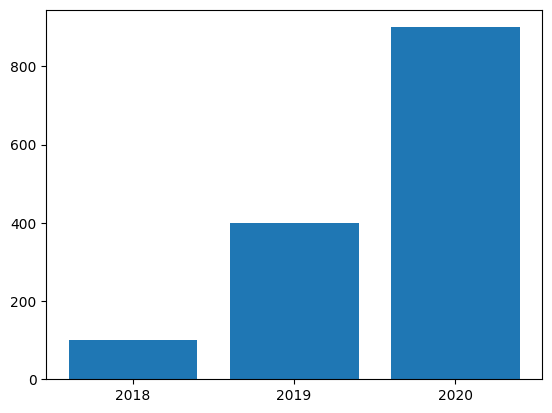

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]
plt.bar(x, values)
plt.xticks(x, years)
plt.show()

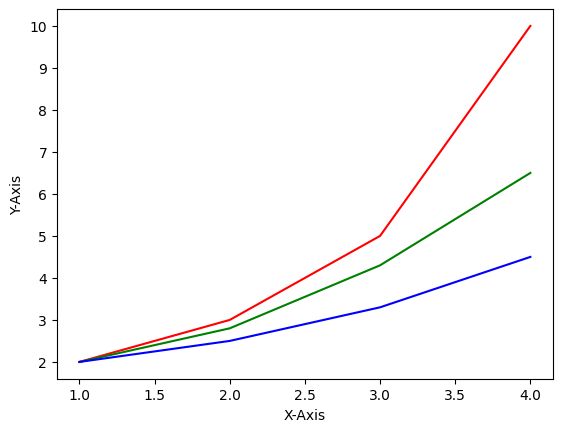

In [302]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [2.0, 3.0, 5.0, 10.0], 'r')
plt.plot([1, 2, 3, 4], [2.0, 2.8, 4.3, 6.5], 'g')
plt.plot([1, 2, 3, 4], [2.0, 2.5, 3.3, 4.5], 'b')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

In [233]:
# sp5=sp4.sort_values(by=['총인원'], axis=0,ascending=False)

In [231]:
# sp6=sp5.head(100)

In [232]:
# sp6 # 오름차순으로 100개의 데이터만 뽑은것.